In [706]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click to hide/unhide code cells."></form>''')


# Does Diet Play a Role in the COVID-19 Outcome?

In this notebook, we will analyze 5 [datasets](https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset) that contain country-level information about fat, calorie, and protein intakes from several food categories to determine the relationship between diet and the COVID-19 outcome.

## Data Loading & Preprocessing

In [591]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Let's import our data so we can begin exploring.

In [110]:
data_root = 'covid19-healthy-diet-dataset'

fat_df = pd.read_csv(f'{data_root}/Fat_Supply_Quantity_Data.csv')
cal_df = pd.read_csv(f'{data_root}/Food_Supply_kcal_Data.csv')
quantity_df = pd.read_csv(f'{data_root}/Food_Supply_Quantity_kg_Data.csv')
protein_df = pd.read_csv(f'{data_root}/Protein_Supply_Quantity_Data.csv')
category_description_df = pd.read_csv(f'{data_root}/Supply_Food_Data_Descriptions.csv')

In [46]:
fat_df.info()
print()
cal_df.info()
print()
quantity_df.info()
print()
protein_df.info()
print()
category_description_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
Country                         170 non-null object
Alcoholic Beverages             170 non-null float64
Animal Products                 170 non-null float64
Animal fats                     170 non-null float64
Aquatic Products, Other         170 non-null float64
Cereals - Excluding Beer        170 non-null float64
Eggs                            170 non-null float64
Fish, Seafood                   170 non-null float64
Fruits - Excluding Wine         170 non-null float64
Meat                            170 non-null float64
Miscellaneous                   170 non-null float64
Milk - Excluding Butter         170 non-null float64
Offals                          170 non-null float64
Oilcrops                        170 non-null float64
Pulses                          170 non-null float64
Spices                          170 non-null float64
Starchy Roots                   170 non-null flo

All data frames except "category_description_df" seem to have countries with missing data for obesity, confimed, death, and recovery rates. For our analysis, we will eliminate these countries.

In [490]:
print('fat_df: {}'.format(fat_df[fat_df.isnull().any(axis=1)]['Country'].tolist()))
print()
print('cal_df: {}'.format(cal_df[cal_df.isnull().any(axis=1)]['Country'].tolist()))
print()
print('quantity_df: {}'.format(quantity_df[quantity_df.isnull().any(axis=1)]['Country'].tolist()))
print()
print('protein_df: {}'.format(protein_df[protein_df.isnull().any(axis=1)]['Country'].tolist()))

fat_df: ['Antigua and Barbuda', 'Bahamas', 'French Polynesia', 'Grenada', 'Kiribati', 'Korea, North', 'Lesotho', 'Myanmar', 'New Caledonia', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'Solomon Islands', 'Taiwan*', 'Tajikistan', 'Turkmenistan', 'Vanuatu']

cal_df: ['Antigua and Barbuda', 'Bahamas', 'French Polynesia', 'Grenada', 'Kiribati', 'Korea, North', 'Lesotho', 'Myanmar', 'New Caledonia', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'Solomon Islands', 'Taiwan*', 'Tajikistan', 'Turkmenistan', 'Vanuatu']

quantity_df: ['Antigua and Barbuda', 'Bahamas', 'French Polynesia', 'Grenada', 'Kiribati', 'Korea, North', 'Lesotho', 'Myanmar', 'New Caledonia', 'Republic of Moldova', 'Saint Kitts and Nevis', 'Saint Lucia', 'Samoa', 'Solomon Islands', 'Taiwan*', 'Tajikistan', 'Turkmenistan', 'Vanuatu']

protein_df: ['Antigua and Barbuda', 'Bahamas', 'French Polynesia', 'Grenada', 'Kiribati', 'Korea, North', 'Lesotho', 'Myanmar', 'New Caledon

In [499]:
fat_df = fat_df[fat_df.isnull().any(axis=1) == False].reset_index(drop=True)
cal_df = cal_df[cal_df.isnull().any(axis=1) == False].reset_index(drop=True)
quantity_df = quantity_df[quantity_df.isnull().any(axis=1) == False].reset_index(drop=True)
protein_df = protein_df[protein_df.isnull().any(axis=1) == False].reset_index(drop=True)

Let's begin by taking a look at our data (countries sorted by death rate).

### fat_df

In [501]:
fat_df.sort_values('Deaths', ascending=False).reset_index(drop=True)\
.style.background_gradient(cmap='Reds', subset=fat_df.columns[1:24])\
.background_gradient(cmap='Blues', subset=fat_df.columns[24:25])\
.background_gradient(cmap='Greens', subset=fat_df.columns[26:28])


### cal_df

In [504]:
cal_df.sort_values('Deaths', ascending=False).reset_index(drop=True)\
.style.background_gradient(cmap='Reds', subset=cal_df.columns[1:24])\
.background_gradient(cmap='Blues', subset=cal_df.columns[24:25])\
.background_gradient(cmap='Greens', subset=cal_df.columns[26:28])


### quantity_df 

In [505]:
quantity_df.sort_values('Deaths', ascending=False).reset_index(drop=True)\
.style.background_gradient(cmap='Reds', subset=quantity_df.columns[1:24])\
.background_gradient(cmap='Blues', subset=quantity_df.columns[24:25])\
.background_gradient(cmap='Greens', subset=quantity_df.columns[26:28])


### protein_df

In [506]:
protein_df.sort_values('Deaths', ascending=False).reset_index(drop=True)\
.style.background_gradient(cmap='Reds', subset=protein_df.columns[1:24])\
.background_gradient(cmap='Blues', subset=protein_df.columns[24:25])\
.background_gradient(cmap='Greens', subset=protein_df.columns[26:28])


### category_description_df

In [502]:
category_description_df

Categories  \
0        Alcoholic Beverages   
1                Animal fats   
2            Animal Products   
3    Aquatic Products, Other   
4   Cereals - Excluding Beer   
5                       Eggs   
6              Fish, Seafood   
7    Fruits - Excluding Wine   
8                       Meat   
9    Milk - Excluding Butter   
10             Miscellaneous   
11                    Offals   
12                  Oilcrops   
13                    Pulses   
14                    Spices   
15             Starchy Roots   
16                Stimulants   
17        Sugar & Sweeteners   
18               Sugar Crops   
19                  Treenuts   
20            Vegetable Oils   
21                Vegetables   
22          Vegetal Products   

                                                Items  
0   Alcohol, Non-Food; Beer; Beverages, Alcoholic;...  
1   Butter, Ghee; Cream; Fats, Animals, Raw; Fish,...  
2   Aquatic Animals, Others; Aquatic Plants; Bovin...  
3   Aquatic Animals, Others; Aquatic Plants; Meat,...  
4   Barley and products; Cereals, Other; Maize and...  
5                                                Eggs  
6   Cephalopods; Crustaceans; Demersal Fish; Fresh...  
7   Apples and products; Bananas; Citrus, Other; D...  
8   Bovine Meat; Meat, Other; Mutton & Goat Meat; ...  
9                             Milk - Excluding Butter  
10                         Infant food; Miscellaneous  
11                                     Offals, Edible  
12  Coconuts - Incl Copra; Cottonseed; Groundnuts ...  
13            Beans; Peas; Pulses, Other and products  
14             Cloves; Pepper; Pimento; Spices, Other  
15  Cassava and products; Potatoes and products; R...  
16  Cocoa Beans and products; Coffee and products;...  
17  Honey; Sugar (Raw Equivalent); Sugar non-centr...  
18                             Sugar beet; Sugar cane  
19                                  Nuts and products  
20  Coconut Oil; Cottonseed Oil; Groundnut Oil; Ma...  
21   Onions; Tomatoes and products; Vegetables, Other  
22  Alcohol, Non-Food; Apples and products; Banana...

## Analysis

Let's compare macronutrient intakes across the top 5 countries with highest death rate and the top 5 countries with lowest death rate.

In [507]:
print('Countries with Highest Death Rate (Avg. {:.2f}%): {}'.format(fat_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:]['Deaths'].mean()*100, str(fat_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:]['Country'].tolist())
))

print('Countries with Lowest Death Rate (Avg. {:.2f}%): {}'.format(fat_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:]['Deaths'].mean()*100, str(fat_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:]['Country'].tolist())
))


Countries with Highest Death Rate (Avg. 5.29%): ['Belgium', 'Spain', 'Italy', 'United Kingdom', 'France']
Countries with Lowest Death Rate (Avg. 0.00%): ['Dominica', 'Namibia', 'Nepal', 'Rwanda', 'Saint Vincent and the Grenadines']


In [519]:
def plot_intake(df, macro, figsize):
    data = pd.melt(df, id_vars='Country', value_vars=df.columns[1:24], var_name='Food Category', value_name='%')
    vis = sns.catplot(x='Food Category', y='%', hue='Country', data=data, s=15, legend=False, palette='plasma')
    plt.xlabel('Food Category', fontsize=15)
    plt.xticks(fontsize=13, rotation=60)
    plt.ylabel(f'% of {macro} Intake', fontsize=15)
    plt.yticks(fontsize=13)
    vis.fig.set_size_inches(figsize)
    plt.legend(fontsize=13, loc='upper center', markerscale=2)
    return vis

def plot_compare_avg_intake(df1, df2, macro):
    df_comparison = pd.concat((df1.iloc[0:5,1:24].mean(), df2.iloc[0:5,1:24].mean()), axis=1)
    df_comparison.columns = ['Belgium, Spain, Italy, United Kingdom, France', 'Nepal, Madagascar, Saint Vincent and the Grenadines, Namibia, Fiji']
    df_comparison = df_comparison.reset_index().rename(columns={'index':'Food Category'})
    plt.gcf().set_size_inches(25, 5)
    vis = sns.barplot(x='Food Category', y=f'% of {macro} Intake', hue='Countries', data=pd.melt(df_comparison, id_vars='Food Category', var_name='Countries', value_name=f'% of {macro} Intake'), palette='plasma')
    plt.xlabel('Food Category', fontsize=15)
    plt.xticks(fontsize=13, rotation=60)
    plt.ylabel(f'% of {macro} Intake', fontsize=15)
    plt.yticks(fontsize=13)
    plt.legend(fontsize=16, loc='upper center', markerscale=2)
    return vis

### Fat Intake

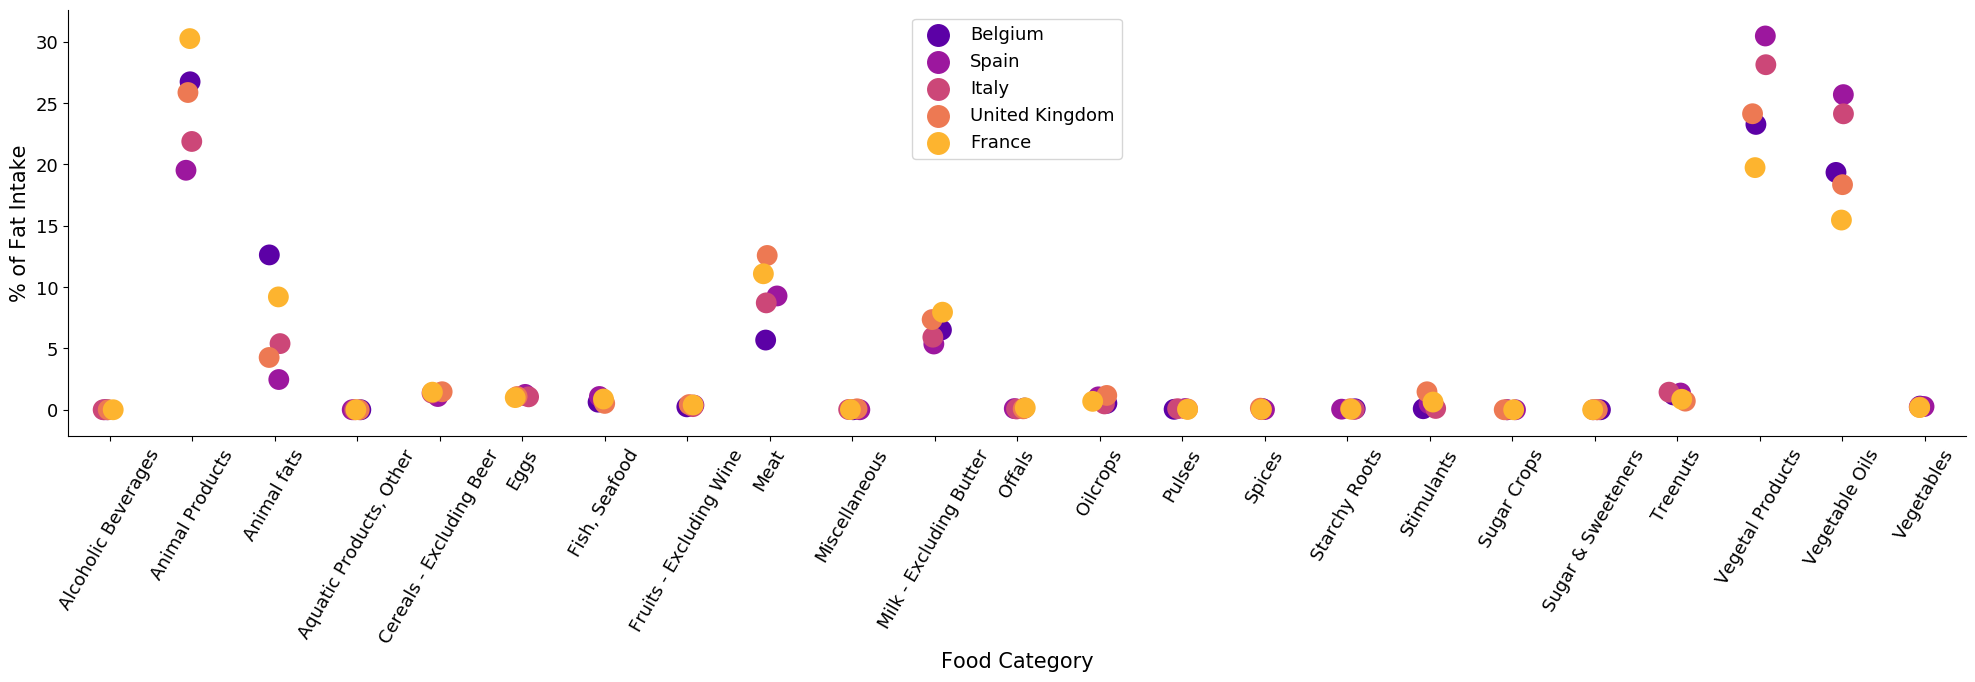

In [612]:
plot_intake(fat_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:], 'Fat', (25,5))


In [619]:
print('Food Categories Responsible for Highest % of Fat Intake Among Above Countries:')
fat_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,1:24].mean().sort_values(ascending=False)[0:5]


Food Categories Responsible for Highest % of Fat Intake Among Above Countries:


Vegetal Products    25.14794
Animal Products     24.85170
Vegetable Oils      20.59722
Meat                 9.46752
Animal fats          6.78834
dtype: float64

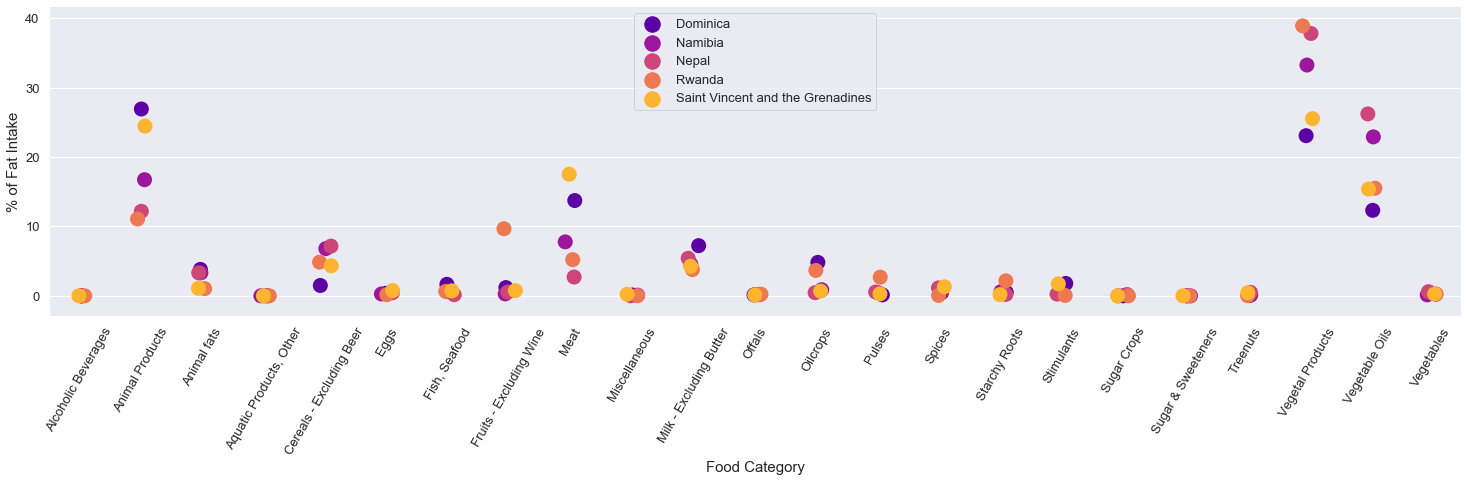

In [510]:
plot_intake(fat_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:], 'Fat', (25,5))

In [620]:
print('Food Categories Responsible for Highest % of Fat Intake Among Above Countries:')
fat_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,1:24].mean().sort_values(ascending=False)[0:5]


Food Categories Responsible for Highest % of Fat Intake Among Above Countries:


Vegetal Products           31.72064
Vegetable Oils             18.46892
Animal Products            18.27712
Meat                        9.39304
Milk - Excluding Butter     5.04556
dtype: float64

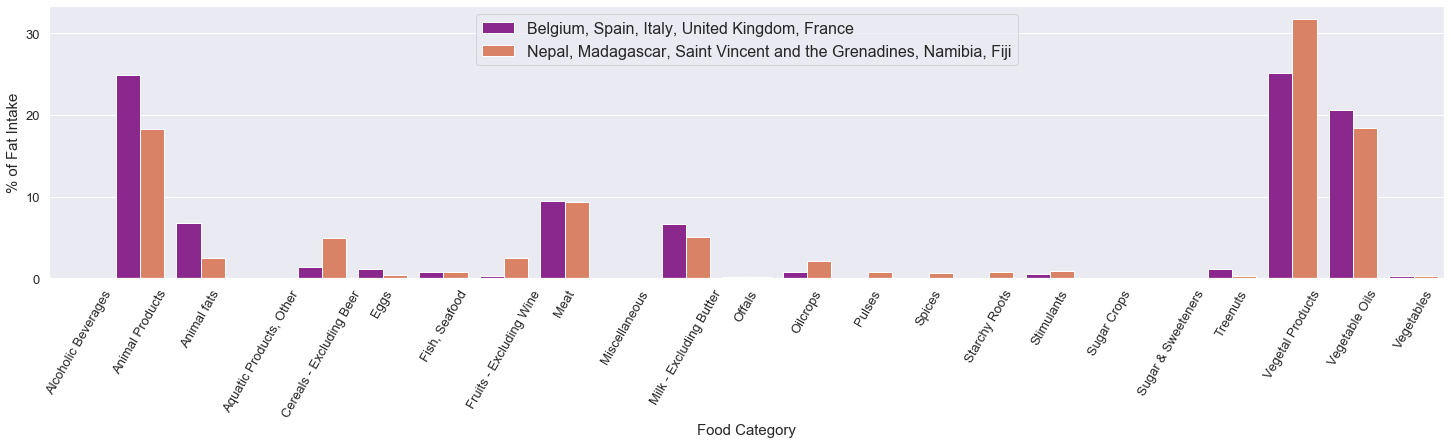

In [511]:
plot_compare_avg_intake(fat_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']), fat_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']), 'Fat')


### Calorie Intake

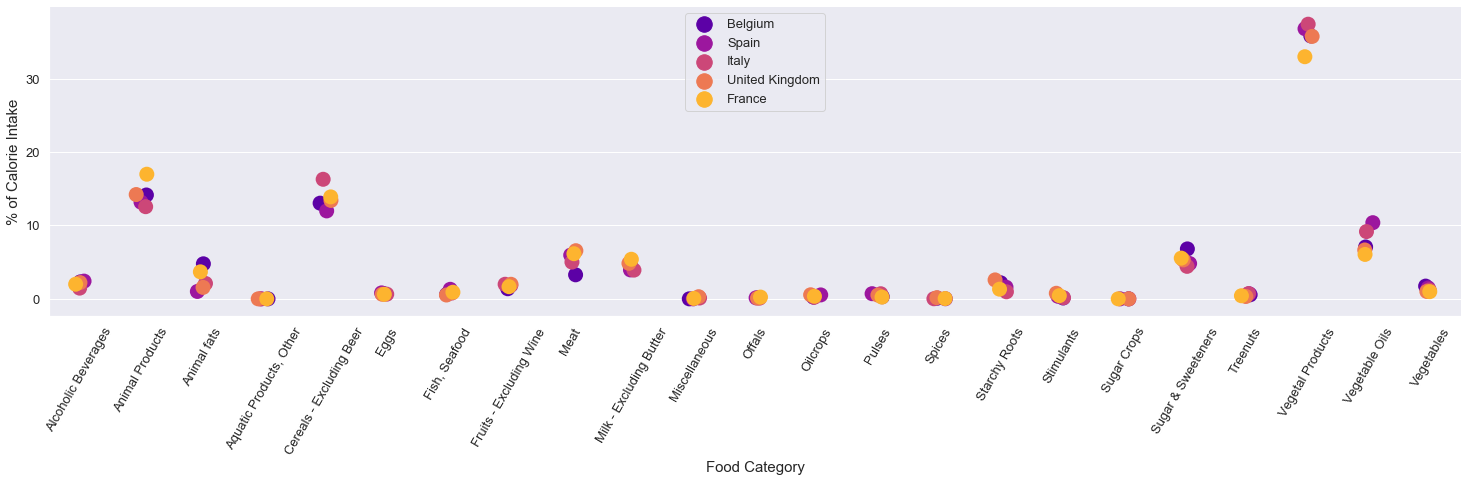

In [512]:
plot_intake(cal_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:], 'Calorie', (25,5))


In [626]:
print('Food Categories Responsible for Highest % of Calorie Intake Among Above Countries:')
cal_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,1:24].mean().sort_values(ascending=False)[0:5]


Food Categories Responsible for Highest % of Calorie Intake Among Above Countries:


Vegetal Products            35.77938
Animal Products             14.22356
Cereals - Excluding Beer    13.73016
Vegetable Oils               7.87026
Meat                         5.39452
dtype: float64

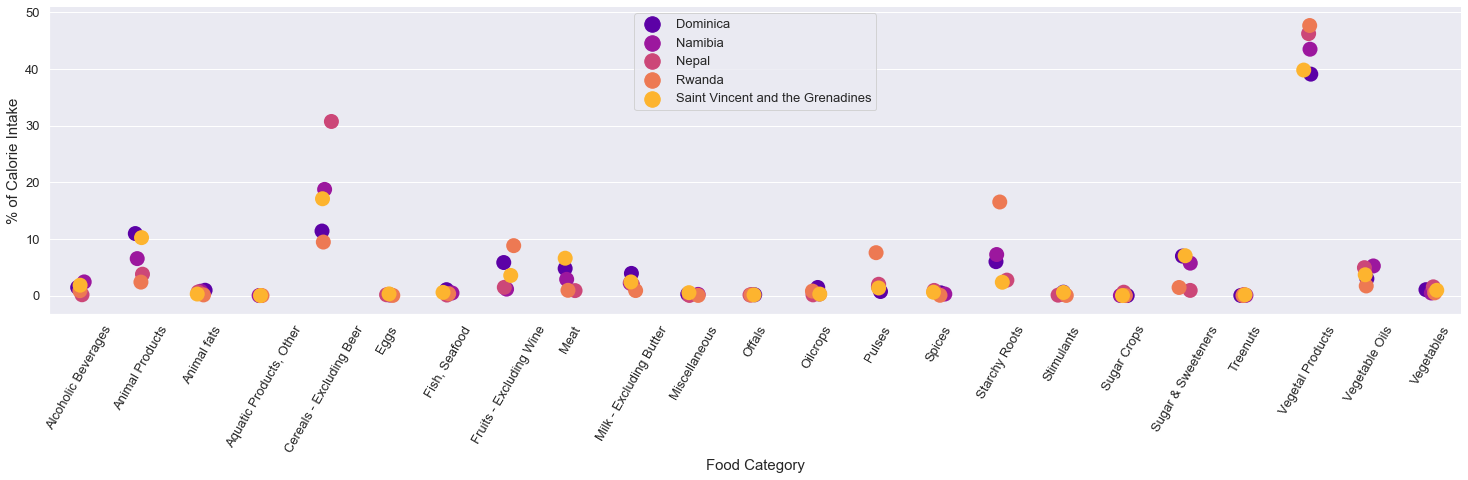

In [513]:
plot_intake(cal_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:], 'Calorie', (25,5))


In [625]:
print('Food Categories Responsible for Highest % of Calorie Intake Among Above Countries:')
cal_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,1:24].mean().sort_values(ascending=False)[0:5]


Food Categories Responsible for Highest % of Calorie Intake Among Above Countries:


Vegetal Products            43.23226
Cereals - Excluding Beer    17.46710
Starchy Roots                6.95772
Animal Products              6.76242
Sugar & Sweeteners           4.40702
dtype: float64

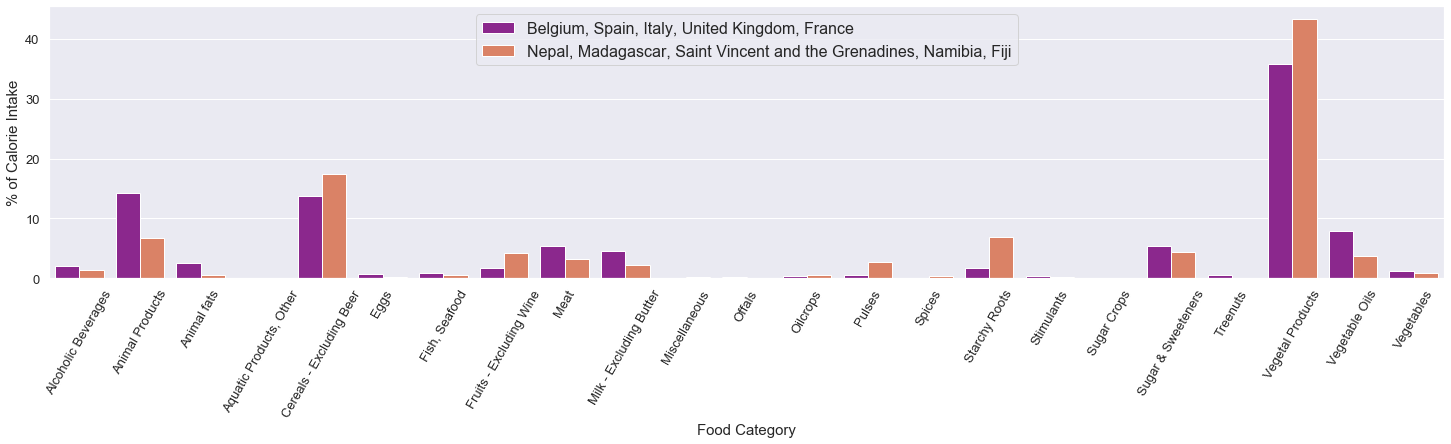

In [514]:
plot_compare_avg_intake(cal_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']), cal_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']), 'Calorie')


### Protein Intake

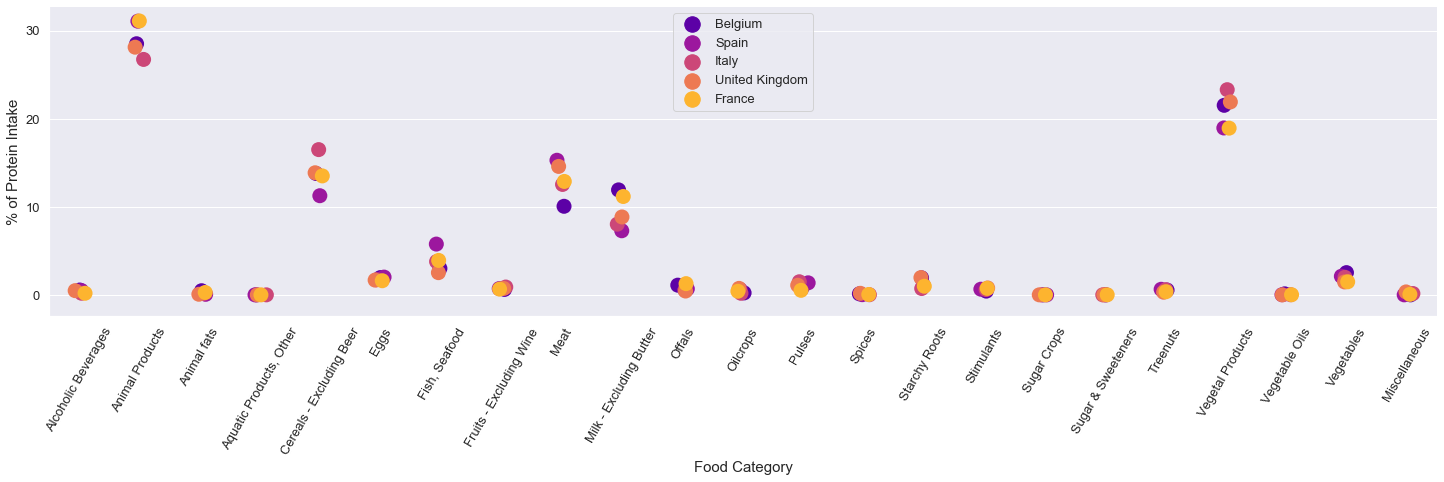

In [515]:
plot_intake(protein_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:], 'Protein', (25,5))


In [627]:
print('Food Categories Responsible for Highest % of Protein Intake Among Above Countries:')
protein_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']).iloc[0:5,1:24].mean().sort_values(ascending=False)[0:5]


Food Categories Responsible for Highest % of Protein Intake Among Above Countries:


Animal Products             29.09334
Vegetal Products            20.90952
Cereals - Excluding Beer    13.77128
Meat                        13.06020
Milk - Excluding Butter      9.44072
dtype: float64

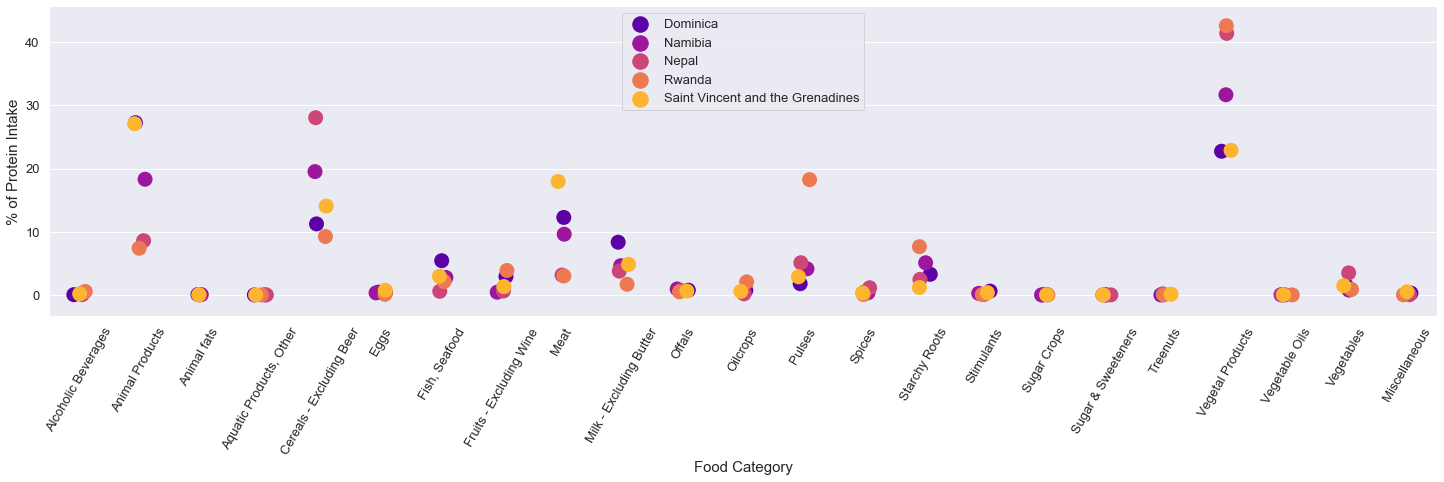

In [516]:
plot_intake(protein_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,:], 'Protein', (25,5))


In [628]:
print('Food Categories Responsible for Highest % of Protein Intake Among Above Countries:')
protein_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']).iloc[0:5,1:24].mean().sort_values(ascending=False)[0:5]


Food Categories Responsible for Highest % of Protein Intake Among Above Countries:


Vegetal Products            32.26802
Animal Products             17.73014
Cereals - Excluding Beer    16.42338
Meat                         9.19582
Pulses                       6.42358
dtype: float64

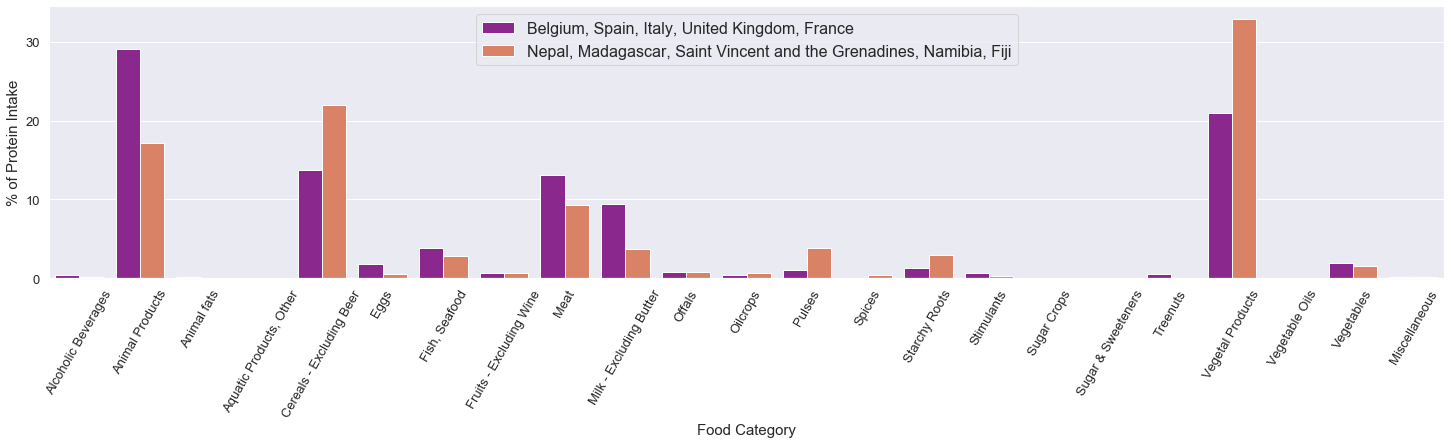

In [476]:
plot_compare_avg_intake(protein_df.sort_values('Deaths', ascending=False).dropna(subset=['Deaths', 'Obesity']), protein_df.sort_values('Deaths').dropna(subset=['Deaths', 'Obesity']), 'Protein')


__Overall, it seems that the countries with the lowest death rate consume a higher percentage of their calories, fat, and protein from vegtable products and cereals, compared to the countries with the highest death rate that consume more animal products and meats.__ 

Let's see if there are any other variables correlated with death rate or confirmed cases.

% Intake from Fat:

In [680]:
fat_df.corr()[['Deaths', 'Confirmed']].reindex(fat_df.corr()[['Deaths', 'Confirmed']].abs().sort_values(['Deaths', 'Confirmed'], ascending=False).index).iloc[4:9].style.background_gradient(cmap='Reds', subset=['Deaths']).background_gradient(cmap='Blues', subset=['Confirmed'])


% Intake from Calories:

In [679]:
cal_df.corr()[['Deaths', 'Confirmed']].reindex(cal_df.corr()[['Deaths', 'Confirmed']].abs().sort_values(['Deaths', 'Confirmed'], ascending=False).index).iloc[4:9].style.background_gradient(cmap='Reds', subset=['Deaths']).background_gradient(cmap='Blues', subset=['Confirmed'])


% Intake from Protein:

In [681]:
protein_df.corr()[['Deaths', 'Confirmed']].reindex(protein_df.corr()[['Deaths', 'Confirmed']].abs().sort_values(['Deaths', 'Confirmed'], ascending=False).index).iloc[4:9].style.background_gradient(cmap='Reds', subset=['Deaths']).background_gradient(cmap='Blues', subset=['Confirmed'])


Let's visualize these correlations and their significance with respect to food categories contributing to calorie intake.

Significance of Correlation
Alcoholic Beverages: p = 0.00
Animal Products: p = 0.00
Animal fats: p = 0.00
Aquatic Products, Other: p = 0.72
Cereals - Excluding Beer: p = 0.00
Eggs: p = 0.00
Fish, Seafood: p = 0.22
Fruits - Excluding Wine: p = 0.86
Meat: p = 0.00
Milk - Excluding Butter: p = 0.00
Miscellaneous: p = 0.40
Offals: p = 0.61
Oilcrops: p = 0.05
Pulses: p = 0.02
Spices: p = 0.14
Starchy Roots: p = 0.11
Stimulants: p = 0.13
Sugar Crops: p = 0.31
Sugar & Sweeteners: p = 0.09
Treenuts: p = 0.00
Vegetal Products: p = 0.00
Vegetable Oils: p = 0.00
Vegetables: p = 0.23
Obesity: p = 0.00
Confirmed: p = 0.00
Deaths: p = 0.00
Recovered: p = 0.00
Active: p = 0.00
Population: p = 0.92


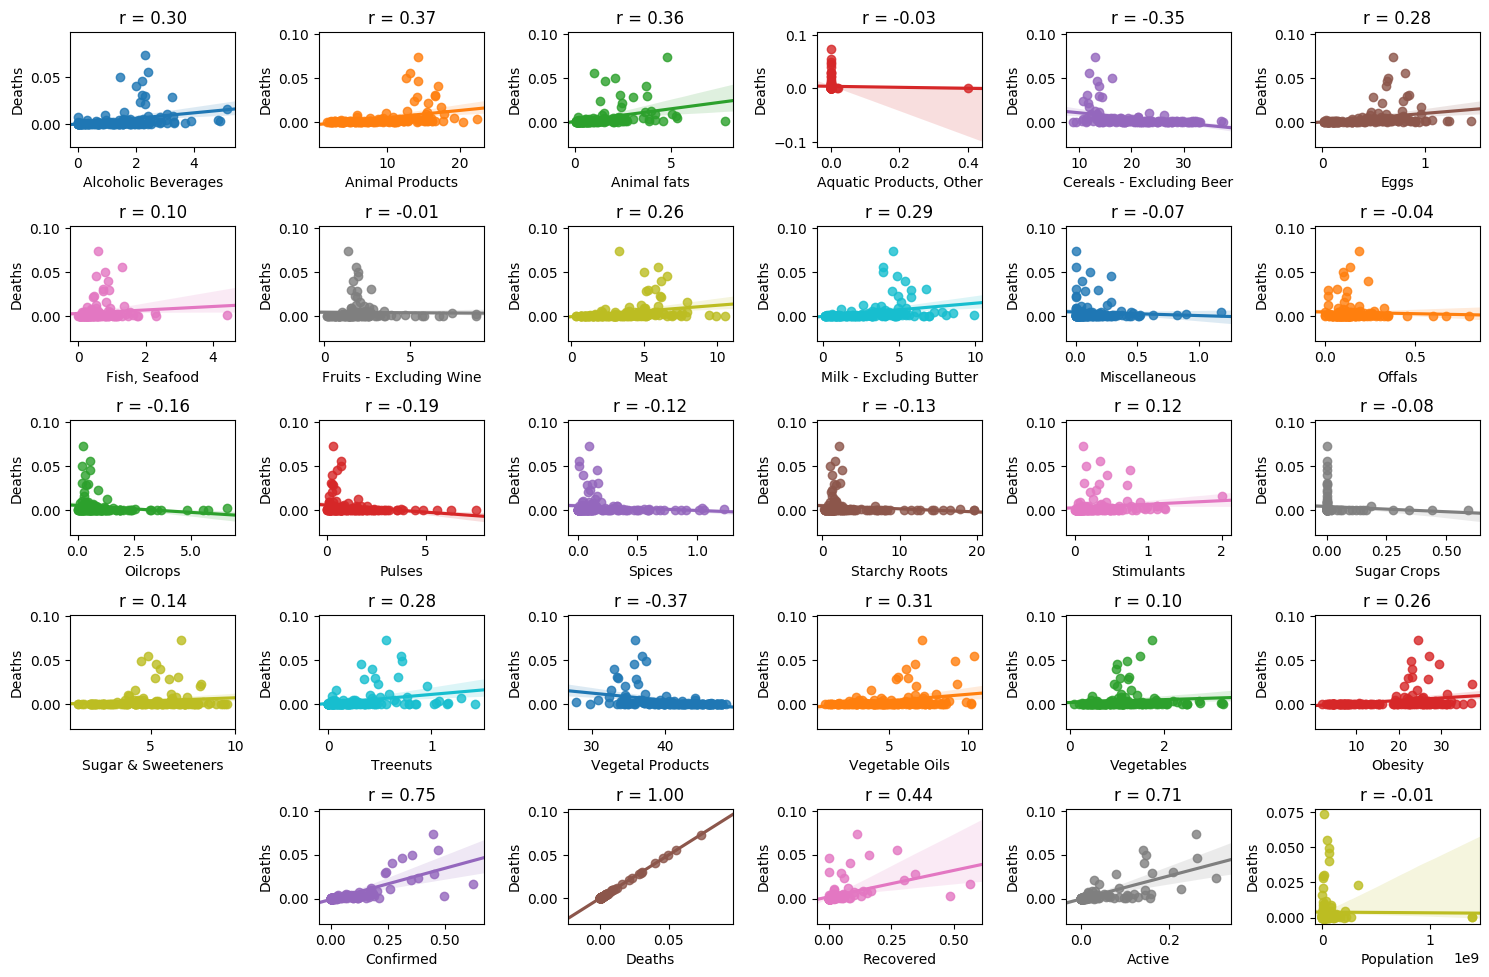

In [657]:
fig, ax = plt.subplots(nrows=5, ncols=6, figsize=(25, 12))
print('Significance of Correlation')
for i, yvar in enumerate(cal_df.columns[1:-1]):
    try:
        slope, intercept, r_value, p_value, std_err = stats.linregress(cal_df[yvar], cal_df['Deaths'])
        print('{}: p = {:.2f}'.format(yvar, p_value))
        g = sns.regplot(x=cal_df[yvar], y=cal_df['Deaths'], ax=ax.flat[i])
        g.set_title('r = {:.2f}'.format(r_value))
        g.figure.set_size_inches(15, 10)
    except TypeError:
        continue
ax[4,0].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

Significance of Correlation
Alcoholic Beverages: p = 0.00
Animal Products: p = 0.00
Animal fats: p = 0.00
Aquatic Products, Other: p = 0.63
Cereals - Excluding Beer: p = 0.00
Eggs: p = 0.00
Fish, Seafood: p = 0.01
Fruits - Excluding Wine: p = 0.58
Meat: p = 0.00
Milk - Excluding Butter: p = 0.00
Miscellaneous: p = 0.33
Offals: p = 0.85
Oilcrops: p = 0.01
Pulses: p = 0.00
Spices: p = 0.16
Starchy Roots: p = 0.01
Stimulants: p = 0.00
Sugar Crops: p = 0.10
Sugar & Sweeteners: p = 0.03
Treenuts: p = 0.00
Vegetal Products: p = 0.00
Vegetable Oils: p = 0.00
Vegetables: p = 0.06
Obesity: p = 0.00
Confirmed: p = 0.00
Deaths: p = 0.00
Recovered: p = 0.00
Active: p = 0.00
Population: p = 0.57


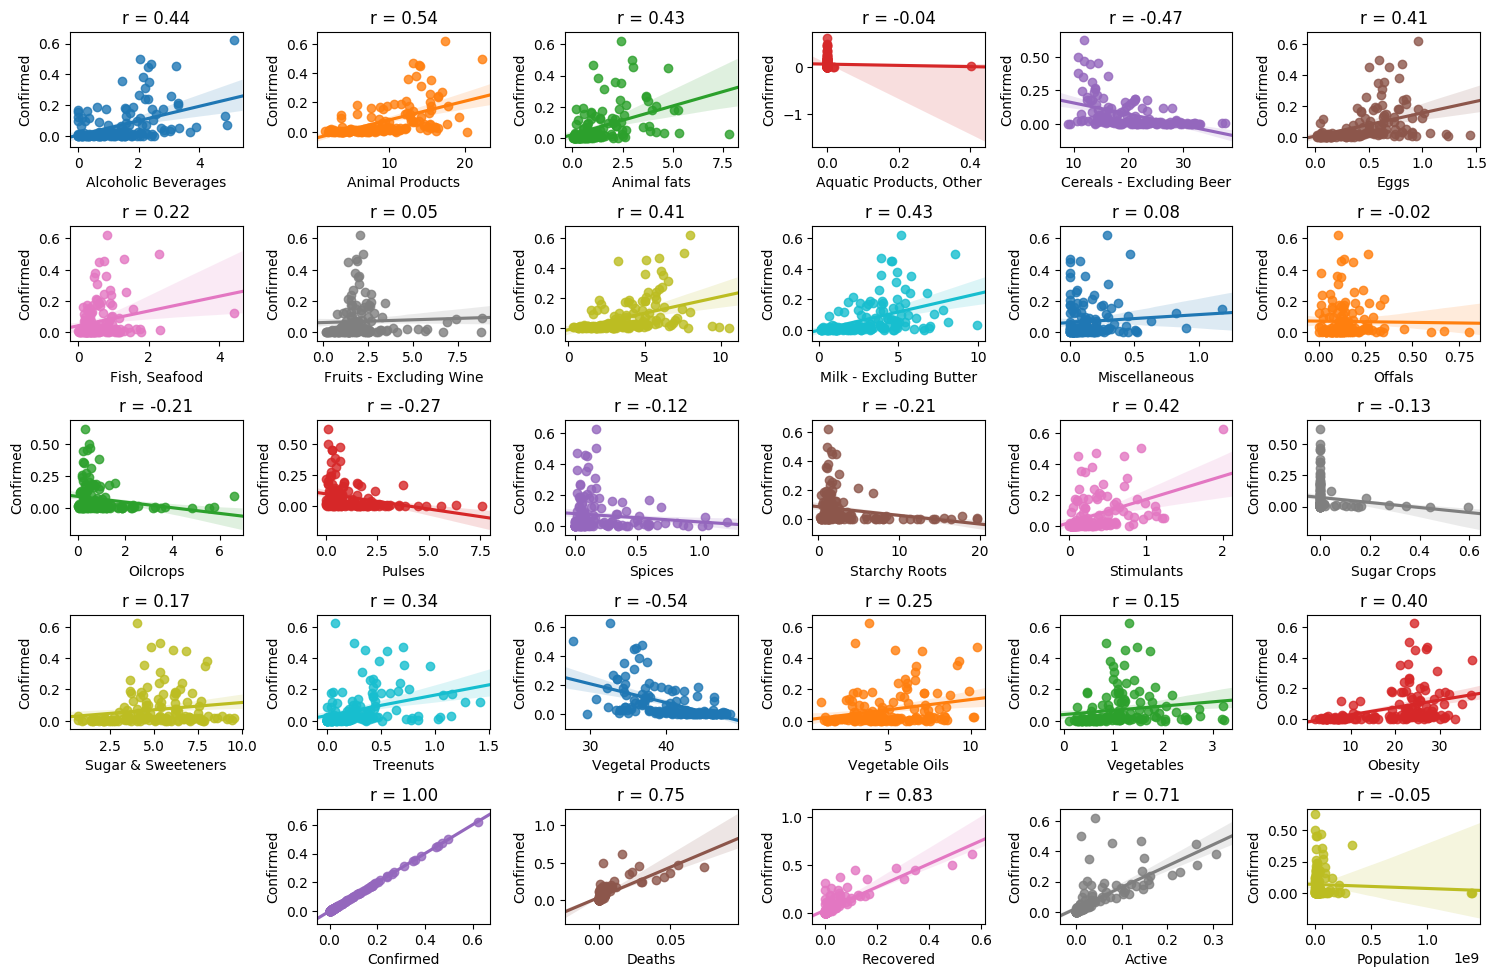

In [658]:
fig, ax = plt.subplots(nrows=5, ncols=6, figsize=(25, 12))
print('Significance of Correlation')
for i, yvar in enumerate(cal_df.columns[1:-1]):
    try:
        slope, intercept, r_value, p_value, std_err = stats.linregress(cal_df[yvar], cal_df['Confirmed'])
        print('{}: p = {:.2f}'.format(yvar, p_value))
        g = sns.regplot(x=cal_df[yvar], y=cal_df['Confirmed'], ax=ax.flat[i])
        g.set_title('r = {:.2f}'.format(r_value))
        g.figure.set_size_inches(15, 10)
    except TypeError:
        continue
ax[4,0].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

__The foods most positively correlated with death rate and confirmed rate are animal products, animal fats, and vegatable oils. The correlations are all significant with p values of ~0. The foods most negatively correlated with death rate and confirmed rate are vegetable products and cereals. The correlations are all significant with p values of ~0.__

## Findings

After studying the food patterns between countries and analyzing the plots above, there are some noteworthy observations. 
- Belgium, Spain, Italy, the United Kingdom, and France have the highest death rates (avg. 5.29%) and consume more animal products, meats, and oils than other countries.
- Dominica, Namibia, Nepal, Rwanda, Saint Vincent and the Grenadines have the lowest death rate (avg. 0.00%) and consume more vegtable products and cereals than other countries. 
- Since there is also a strong correlation between the # of confirmed cases and deaths, this suggests that these foods could have an impact on COVID-19 risk.

Foods that fall into the animal products, meat, and oil categories that could be avoided:

In [702]:
category_description_df[category_description_df['Categories'].isin(['Animal Products','Meat', 'Vegetable Oils'])]['Items'].tolist()


['Aquatic Animals, Others; Aquatic Plants; Bovine Meat; Butter, Ghee; Cephalopods; Cream; Crustaceans; Demersal Fish; Eggs; Fats, Animals, Raw; Fish, Body Oil; Fish, Liver Oil; Freshwater Fish; Marine Fish, Other; Meat, Aquatic Mammals; Meat, Other; Milk - Excluding Butter; Molluscs, Other; Mutton & Goat Meat; Offals, Edible; Pelagic Fish; Pigmeat; Poultry Meat',
 'Bovine Meat; Meat, Other; Mutton & Goat Meat; Pigmeat; Poultry Meat',
 'Coconut Oil; Cottonseed Oil; Groundnut Oil; Maize Germ Oil; Oilcrops Oil, Other; Olive Oil; Palm Oil; Palmkernel Oil; Rape and Mustard Oil; Ricebran Oil; Sesameseed Oil; Soyabean Oil; Sunflowerseed Oil']

Foods that fall into the vegetable products and cereals categories that could consumed more:

In [704]:
category_description_df[category_description_df['Categories'].isin(['Vegetal Products', 'Cereals - Excluding Beer'])]['Items'].tolist()


['Barley and products; Cereals, Other; Maize and products; Millet and products; Oats; Rice (Milled Equivalent); Rye and products; Sorghum and products; Wheat and products',
 'Alcohol, Non-Food; Apples and products; Bananas; Barley and products; Beans; Beer; Beverages, Alcoholic; Beverages, Fermented; Cassava and products; Cereals, Other; Citrus, Other; Cloves; Cocoa Beans and products; Coconut Oil; Coconuts - Incl Copra; Coffee and products; Cottonseed; Cottonseed Oil; Dates; Fruits, Other; Grapefruit and products; Grapes and products (excl wine); Groundnut Oil; Groundnuts (Shelled Eq); Honey; Infant food; Lemons, Limes and products; Maize and products; Maize Germ Oil; Millet and products; Miscellaneous; Nuts and products; Oats; Oilcrops Oil, Other; Oilcrops, Other; Olive Oil; Olives (including preserved); Onions; Oranges, Mandarines; Palm kernels; Palm Oil; Palmkernel Oil; Peas; Pepper; Pimento; Pineapples and products; Plantains; Potatoes and products; Pulses, Other and products; Rap

As with any disease, there are copious amounts of risk factors (population density, underlying health problems, age, geolocation, etc.) that were not studied in this notebook. However, after all, it does seem that vegetarian diets could be worth considering! As WebMD states, "Vegetarians appear to have lower low-density lipoprotein cholesterol levels, lower blood pressure and lower rates of hypertension and type 2 diabetes than meat eaters. Vegetarians also tend to have a lower body mass index, lower overall cancer rates and lower risk of chronic disease."